In [7]:
import pandas as pd
import numpy as np
import PyPDF2
from PyPDF2 import PdfFileReader, PdfFileWriter
import matplotlib.pyplot as plt
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import gensim
from gensim.models.phrases import Phrases, Phraser
import spacy
from spacy import displacy

In [10]:
book='Ecommerce_Business_Guide.pdf'

In [11]:
pdfFileObj = open(book, 'rb')

In [12]:
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

In [13]:
print(pdfReader.numPages)

15


In [14]:
pageObj = pdfReader.getPage(0)

In [7]:
print(pageObj.extractText())

Complete Guide 
to Building an 
E-Commerce Business 
CONTENT AND SOCIAL MEDIA      MARKETINGFOR SMALL BUSINESSES


In [8]:
pdfFileObj.close()

In [11]:
def extract_information(pdf_path):
    with open(pdf_path, 'rb') as f:
        pdf = PdfFileReader(f)
        information = pdf.getDocumentInfo()
        number_of_pages = pdf.getNumPages()

    txt = f"""
    Information about {pdf_path}: 

    Author: {information.author}
    Creator: {information.creator}
    Producer: {information.producer}
    Subject: {information.subject}
    Title: {information.title}
    Number of pages: {number_of_pages}
    """

    print(txt)
    return information

path = book
extract_information(path)


    Information about 100-The-Complete-Guide-to-Building-an-Ecommerce-Business-by-Digital-Sherpa.pdf: 

    Author: None
    Creator: Adobe InDesign CS5.5 (7.5.3)
    Producer: Adobe PDF Library 9.9
    Subject: None
    Title: None
    Number of pages: 15
    


{'/CreationDate': "D:20131202113306-05'00'",
 '/Creator': 'Adobe InDesign CS5.5 (7.5.3)',
 '/ModDate': "D:20131202113307-05'00'",
 '/Producer': 'Adobe PDF Library 9.9',
 '/Trapped': '/False'}

In [12]:
file_path = book
pdf = PdfFileReader(file_path)

with open('book.txt', 'w',encoding='utf-8') as f:
    for page_num in range(pdf.numPages):
        # print('Page: {0}'.format(page_num))
        pageObj = pdf.getPage(page_num)

        try: 
            txt = pageObj.extractText()
            print(''.center(100, '-'))
        except:
            pass
        else:
            f.write('Page {0}\n'.format(page_num+1))
            f.write(''.center(100, '-'))
            f.write(txt)
    f.close()

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------

In [13]:
with open('book.txt',encoding='utf-8') as f:
    lines = f.readlines()

In [14]:
lines

['Page 1\n',
 '----------------------------------------------------------------------------------------------------Complete Guide \n',
 'to Building an \n',
 'E-Commerce Business \n',
 'CONTENT AND SOCIAL MEDIA      MARKETINGFOR SMALL BUSINESSESPage 2\n',
 '----------------------------------------------------------------------------------------------------www.digitalsherpa.com\n',
 'Advancement in technology and an increasingly savvy consumer market has made e-commerce a powerful force in the global economy. With more people opting to shop on the Internet, SMBs take steps to reach this market by setting up online shops. As more payment services providers get into the market, setting up an e-commerce website is no longer cost-prohibitive. Today, anyone with basic web skills can set up a robust e-commerce site within a few days and without breaking the bank.One of the major things that buyers are concerned about when shopping online is their security. With major online fraud cases being 

In [15]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\manan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
lines = list(set(lines))

In [17]:
lines = ' '.join(lines)

In [18]:
txt_upd=lines

In [19]:
txt_upd = re.sub("[^A-Za-z" "]+"," ",txt_upd).lower() #remove special character
# txt_upd = re.sub("[0-9" "]+"," ",txt_upd).lower() #remove numbers
txt_upd = re.sub(r'^https?:\/\/.*[\r\n]*', '', txt_upd).lower() #remove hyperlink

In [20]:
txt_upd

'ii use redirectswhen you stop selling some products on your website you may want to delete the pages where the products were listed when you delete pages use redirects to guide customers to a new page redirects improve customer experience on your site and ensure your site retains link juice from the deleted pages iii use canonicalizationif your site has a number of pages that have the same content use link rel canonical href to tell google which page should be given preference this will also make the site safe from duplicate content penalties and other irrelevant links on your site search engine robots cannot read images on websites to optimize images for seo use alt tags for each of them the alt tag is simply a text description of the image tip when writing the alt tags make sure they contain the target keyword of the product use your target product keywords in the title tags apart from this optimize the product descriptions to improve the click through rate when writing the descript

In [21]:
text_tokens = word_tokenize(txt_upd)

In [22]:
text_tokens

['ii',
 'use',
 'redirectswhen',
 'you',
 'stop',
 'selling',
 'some',
 'products',
 'on',
 'your',
 'website',
 'you',
 'may',
 'want',
 'to',
 'delete',
 'the',
 'pages',
 'where',
 'the',
 'products',
 'were',
 'listed',
 'when',
 'you',
 'delete',
 'pages',
 'use',
 'redirects',
 'to',
 'guide',
 'customers',
 'to',
 'a',
 'new',
 'page',
 'redirects',
 'improve',
 'customer',
 'experience',
 'on',
 'your',
 'site',
 'and',
 'ensure',
 'your',
 'site',
 'retains',
 'link',
 'juice',
 'from',
 'the',
 'deleted',
 'pages',
 'iii',
 'use',
 'canonicalizationif',
 'your',
 'site',
 'has',
 'a',
 'number',
 'of',
 'pages',
 'that',
 'have',
 'the',
 'same',
 'content',
 'use',
 'link',
 'rel',
 'canonical',
 'href',
 'to',
 'tell',
 'google',
 'which',
 'page',
 'should',
 'be',
 'given',
 'preference',
 'this',
 'will',
 'also',
 'make',
 'the',
 'site',
 'safe',
 'from',
 'duplicate',
 'content',
 'penalties',
 'and',
 'other',
 'irrelevant',
 'links',
 'on',
 'your',
 'site',
 'searc

In [23]:
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

In [24]:
tokens_without_sw

['use',
 'redirectswhen',
 'stop',
 'selling',
 'products',
 'website',
 'may',
 'delete',
 'pages',
 'products',
 'listed',
 'delete',
 'pages',
 'use',
 'redirects',
 'guide',
 'customers',
 'new',
 'page',
 'redirects',
 'improve',
 'customer',
 'experience',
 'site',
 'ensure',
 'site',
 'retains',
 'link',
 'juice',
 'deleted',
 'pages',
 'iii',
 'use',
 'canonicalizationif',
 'site',
 'number',
 'pages',
 'content',
 'use',
 'link',
 'rel',
 'canonical',
 'href',
 'tell',
 'google',
 'page',
 'given',
 'preference',
 'make',
 'site',
 'safe',
 'duplicate',
 'content',
 'penalties',
 'irrelevant',
 'links',
 'site',
 'search',
 'engine',
 'robots',
 'read',
 'images',
 'websites',
 'optimize',
 'images',
 'seo',
 'use',
 'tags',
 'tag',
 'simply',
 'text',
 'description',
 'image',
 'tip',
 'writing',
 'tags',
 'make',
 'sure',
 'contain',
 'target',
 'keyword',
 'product',
 'use',
 'target',
 'product',
 'keywords',
 'title',
 'tags',
 'apart',
 'optimize',
 'product',
 'descript

In [25]:
tf = TfidfVectorizer()

In [26]:
text_tf = tf.fit_transform(tokens_without_sw)

In [27]:
feature_names = tf.get_feature_names()
dense = text_tf.todense()
denselist = dense.tolist()
df =pd.DataFrame(denselist, columns=feature_names)

In [28]:
df.head()

,able,accept,accepted,accepting,access,account,accounts,achieving,across,action,...,world,worth,wp,write,writing,written,www,yahoo,youtube,zen
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
word_list = ' '.join(df)

In [30]:
wordcloud = WordCloud(background_color='black',
                      width=1800,
                      height=1400).generate(word_list)

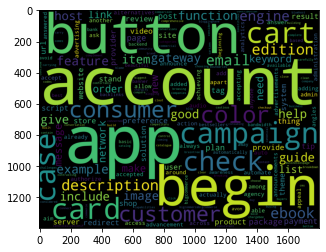

In [31]:
plt.imshow(wordcloud)

In [51]:
df2 = pd.read_csv("book.txt", header=None, sep="\n", names=["text"])

In [64]:
df2.head()

,text
0,Page 1
1,----------------------------------------------...
2,to Building an
3,E-Commerce Business
4,CONTENT AND SOCIAL MEDIA MARKETINGFOR SMA...


In [88]:
df2['text_lower'] = df2['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df2.head()

,text,text_lower
0,Page 1,page 1
1,----------------------------------------------...,----------------------------------------------...
2,to Building an,to building an
3,E-Commerce Business,e-commerce business
4,CONTENT AND SOCIAL MEDIA MARKETINGFOR SMA...,content and social media marketingfor small bu...


In [89]:
df2.shape

(41, 2)

## Wordcloud with Unigrams

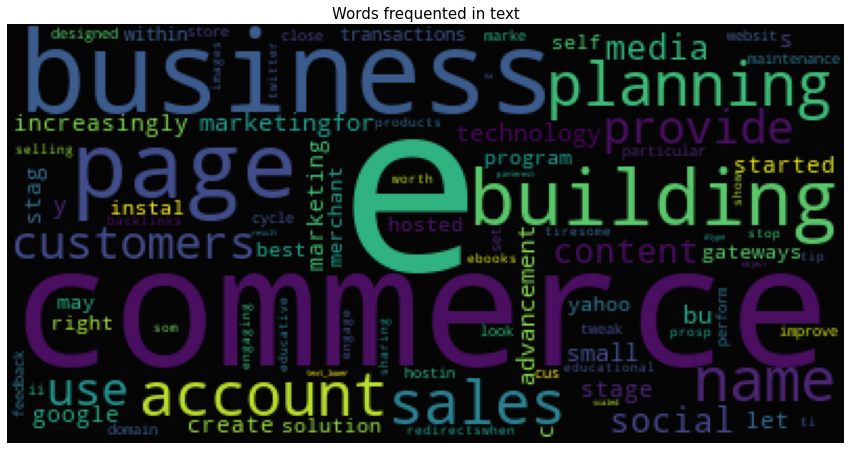

In [36]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                        background_color='black',
                        stopwords=stopwords,
                        max_words=200, 
                        random_state=42).generate(str(df2['text_lower']))

plt.figure(figsize=(15,10))
plt.axis("off")
plt.title("Words frequented in text", fontsize=15)
plt.imshow(wordcloud.recolor(colormap= 'viridis' , random_state=42), alpha=0.98)
plt.show()

Stopwords like "a", "the" etc are not useful while working with text, in general. The better way is to have a custom stopwords list relevant to the use case because words like "of" can be present in company name and we don't want that to be removed. For the purpose of this problem and time constraint I'm going with the general list.

In [37]:
df2['text'] = df2['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))
df2['text_lower'] = df2['text_lower'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))
df2.head()

,text,text_lower
0,Page 1,page 1
1,----------------------------------------------...,----------------------------------------------...
2,Building,building
3,E-Commerce Business,e-commerce business
4,CONTENT AND SOCIAL MEDIA MARKETINGFOR SMALL BU...,content social media marketingfor small busine...


Putting "(" and ")" in place of its POS tag. This step is not necessary but as I have to work with words in general for finding similarities and closest matches, I need these as punctuations. 

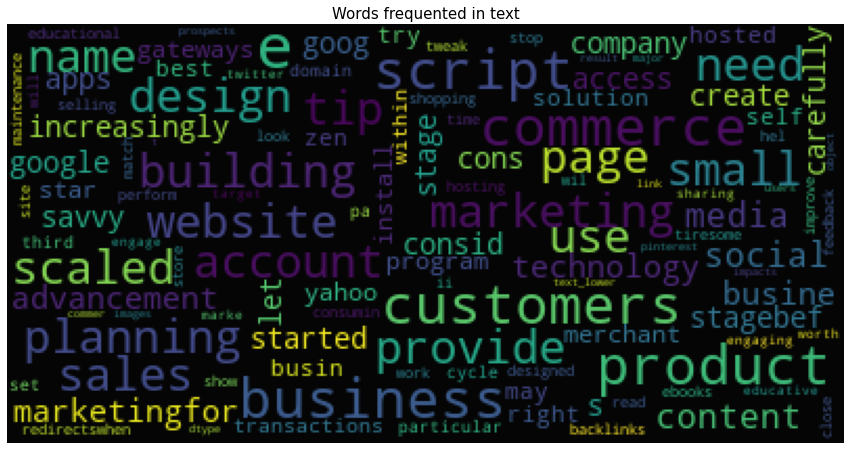

In [38]:
wordcloud = WordCloud(
                        background_color='black',
                        stopwords=stopwords,
                        max_words=200,
                        max_font_size=30,
                        random_state=42).generate(str(df2['text_lower']))

plt.figure(figsize=(15,10))
plt.axis("off")
plt.title("Words frequented in text", fontsize=15)
plt.imshow(wordcloud.recolor(colormap= 'viridis' , random_state=42), alpha=0.98)
plt.show()

## Wordcloud with Trigrams and Bigrams

Looking at the text, its relevance is to **Natural Language Processing**. This word is not covered in unigrams so we to have trigrams and bigrams which will give much more information about the corpus.

Using **Gensim's Phrases** we can generate bigrams and trigrams.

In [39]:
sentences=[text.split() for text in df2.text_lower.values]
phrases = Phrases(sentences)
bigram = Phraser(phrases)
trigram = Phrases(bigram[sentences])

In [40]:
df2['trigrams'] = df2['text_lower'].apply(lambda x: " ".join(trigram[bigram[x.split()]]))
df2.head()

,text,text_lower,trigrams
0,Page 1,page 1,page 1
1,----------------------------------------------...,----------------------------------------------...,----------------------------------------------...
2,Building,building,building
3,E-Commerce Business,e-commerce business,e-commerce business
4,CONTENT AND SOCIAL MEDIA MARKETINGFOR SMALL BU...,content social media marketingfor small busine...,content social_media marketingfor small busine...


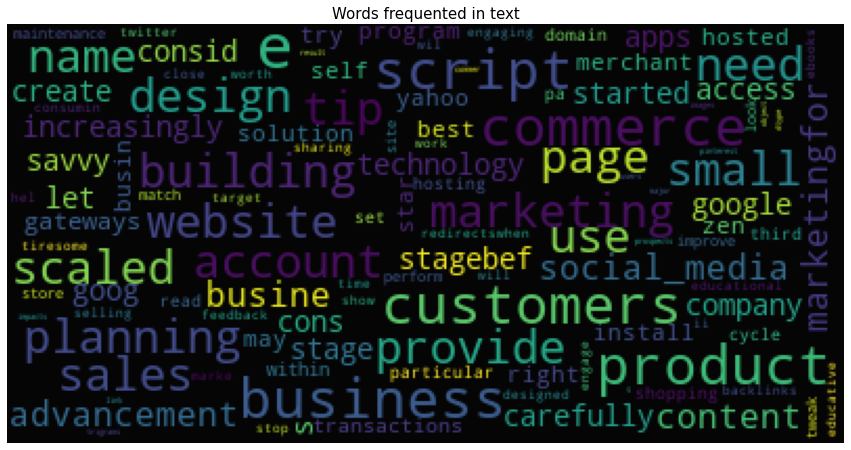

In [41]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                        background_color='black',
                        stopwords=stopwords,
                        max_words=200,
                        max_font_size=30,
                        random_state=42).generate(str(df2['trigrams']))

plt.figure(figsize=(15,10))
plt.axis("off")
plt.title("Words frequented in text", fontsize=15)
plt.imshow(wordcloud.recolor(colormap= 'viridis' , random_state=42), alpha=0.98)
plt.show()

This is a much better wordcloud which clearly shows what this corpus is talking about. **nlp** is more highlighted now. Words like **natural_language_processing** and **text_segmentation** are visible now which were not there in previuos cases.

# Finding entities in text

I'm using **spacy** to get the enitities present in the text. I'm using **en_core_web_sm** model of spacy which is pre-trained in general english dictionary. As this is a demo work, this step should work but in real product development cases this step should not be done. The model should be trained according to the business need so that it can map the correct entities. Like in this case, the model is mappling **NLP** to **ORG** label because that's what it is trained like, all caps words should be organization names.

It also fails to recognize **Natural language processing** as an entity because it has not be trained to do so.

In [42]:
def get_entities(text):
    parsed_text = nlp(text)
    entities = list(parsed_text.ents)
    named_entities = []
    for entity in entities:
        if entity.label_ in ["ORG", "PERSON"]:
            named_entities.append(entity)
    return named_entities

In [51]:
# !python -m spacy download en_core_web_sm

In [43]:
nlp=spacy.load('en_core_web_sm')

In [44]:
df2['entities'] = df2['text'].apply(get_entities)

In [45]:
df2.head()

,text,text_lower,trigrams,entities
0,Page 1,page 1,page 1,[]
1,----------------------------------------------...,----------------------------------------------...,----------------------------------------------...,[]
2,Building,building,building,[]
3,E-Commerce Business,e-commerce business,e-commerce business,[]
4,CONTENT AND SOCIAL MEDIA MARKETINGFOR SMALL BU...,content social media marketingfor small busine...,content social_media marketingfor small busine...,"[(CONTENT, AND, SOCIAL, MEDIA, MARKETINGFOR, S..."


In [46]:
unique_entities = set()
for entry in df2.entities.values:
    for entity in entry:
        if entity:
            if (len(entity.orth_.strip()) == 3 and entity.orth_.strip().isupper()) or len(entity.orth_.strip()) > 3:
                unique_entities.add(entity.orth_.strip())

unique_entities

{'BigCommerce',
 'Bluehost Hostgator',
 'CMS',
 'CONTENT AND SOCIAL MEDIA MARKETINGFOR SMALL BUSINESSESPage 2',
 'ChargeBee',
 'Email',
 'GoDaddy',
 'Google',
 'Magento',
 'PHP',
 'PPC',
 'Pinterest',
 'Professional Enterprise',
 'SEO',
 'SMBs',
 'SSL',
 'U.S. Authorize.net',
 'User Interface',
 'WooCommerce',
 'WordPress',
 'Y!MS',
 'Yahoo',
 'YouTube',
 'cPanel',
 'eBook',
 'eBooks'}

# Dependency Graph Example

Here I'm showing how **spacy** can be used to find the dependecy graph of a text. It is used to find triples (subject, relation, object). This piece also suffers from the same problem as stated above. Because of time constraint I'm not training the model with input data beacuse that would mean tagging entities with label so that they are combined wherever necessary like in the case of **Natural language processing**.

In [47]:
parsed_text=nlp(df2.text.values[0])
for token in parsed_text:
    print(token.text, token.dep_, token.head.text, token.head.pos_,
          [child for child in token.children])

Page ROOT Page NOUN [1]
1 nummod Page NOUN []


In [48]:
displacy.render(parsed_text, style='dep', jupyter=True, options={'compact': True, 'offset_x': 30, 'word_spacing': 20})

# Word2Vec to analyze given text

Here I'm going with 2 approaches:
 - Use GloVe pretrained model to find word vectors
 - Train word2vec model with given data and check for improvements

## Using GloVe

GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space.

Gensim can be used to load this model and find similarity between 2 words, using cosine similarity. Which can tell us what the text is talking about.

Let's see if GloVe is useful to this case.

In [49]:
word_vector = gensim.models.KeyedVectors.load_word2vec_format("glove.txt", binary=False)

FileNotFoundError: [Errno 2] No such file or directory: 'glove.txt'

In [20]:
import matplotlib